/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_5929/2278016496.py:22: UserWarning: Approach is not set. Defaulting to 'primal'.
  gdf = mp.nx_to_gdf(g)


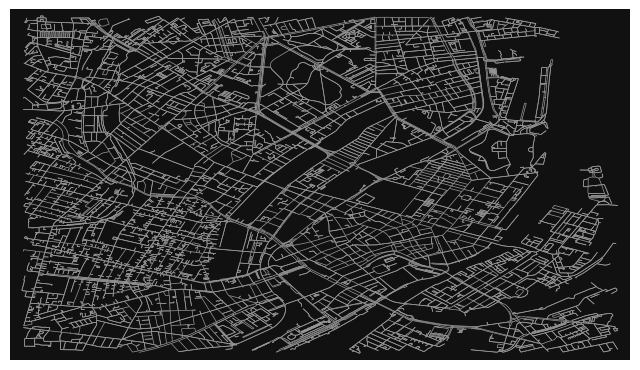

In [33]:
# %%
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
from folium import plugins
from folium.plugins import HeatMap
from shapely.geometry import Point, LineString, Polygon
import shapely
import momepy as mp 
import esda
import seaborn as sns
sns.set_theme()

lat, lon = 55.6867243, 12.5700724

def get_city_graph(lat, lon, dist, polygonize=False, plot = False):
    g = ox.graph_from_point((lat, lon), dist=dist, network_type='bike', simplify=True, retain_all=False)
    gdf = mp.nx_to_gdf(g)
    edges = gdf[1].to_crs('EPSG:3857')
    if polygonize:
        linestrings = edges.geometry # our geopandas.GeoSeries of linestrings representing street network
        collection = shapely.GeometryCollection(linestrings.array)  # combine to a single object
        noded = shapely.node(collection)  # add missing nodes
        polygonized = shapely.polygonize(noded.geoms)  # polygonize based on an array of noded parts
        polygons = gpd.GeoSeries(polygonized.geoms)  # create a GeoSeries from parts
        return g, edges, polygons
    if plot:
        ### plot the graph
        fig, ax = ox.plot_graph(g, node_size=0, edge_linewidth=0.5, show=False, close=False)
        edges.plot(ax=ax, linewidth=1, edgecolor='black')
        plt.show()
    return g, edges

g, edges = get_city_graph(lat, lon, 2500)

fig, ax = ox.plot_graph(g, node_size=0, edge_linewidth=0.5, show=False, close=False)
edges.plot(ax=ax, linewidth=1, edgecolor='black')

import nx_parallel as nxp
import networkx as nx

# enabling networkx's config for nx-parallel
nx.config.backends.parallel.active = True

# setting `n_jobs` (by default, `n_jobs=None`)
nx.config.backends.parallel.n_jobs = 4


In [41]:
H = nx.line_graph(g)
H.add_nodes_from((node, g.edges[node]) for node in H)
import random
for node in H:
    H.nodes[node]['received'] = []
    if random.random() < 0.1:
        H.nodes[node]['signal'] = random.randint(0, 100)
    else:
        H.nodes[node]['signal'] = 0


In [44]:
## copy H
H2 = H.copy()

## send signal to neighbors

def send_signal(H, node):
    for neighbor in H.neighbors(node):
        H.nodes[neighbor]['received'].append(H.nodes[node]['signal'])
    return H

signals = []

for _ in range(10):
    for node in H:
        H = send_signal(H, node)
    for node in H:
        H.nodes[node]['signal'] = np.mean(H.nodes[node]['received'])
        H.nodes[node]['received'] = []
    signals.append([H.nodes[node]['signal'] for node in H])


/Users/christianrasmussen/Documents/thesis/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/christianrasmussen/Documents/thesis/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [46]:
signals[1]


[np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(7.970891288048379),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(8.72154709460349),
 np.float64(8.562935426631466),
 np.float64(8.562935426631466),
 np.float64(8.72154709460349),
 np.float64(8.276098539831224),
 np.float64(8.276098539831224),
 np.float64(8.276098539831224),
 np.float64(8.130486230498622),
 np.float64(7.37655288470698),
 np.float64(7.37655288470698),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(4.429373588963191),
 np.float64(3.318137263219688),
 np.float64(3.318137263219688),
 np.float64(4.429373588963191),
 np.float64(3.326940

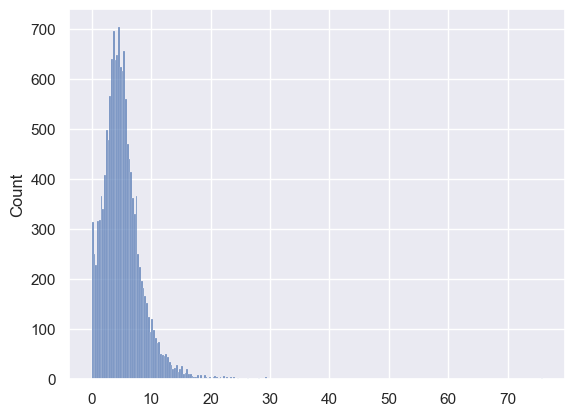

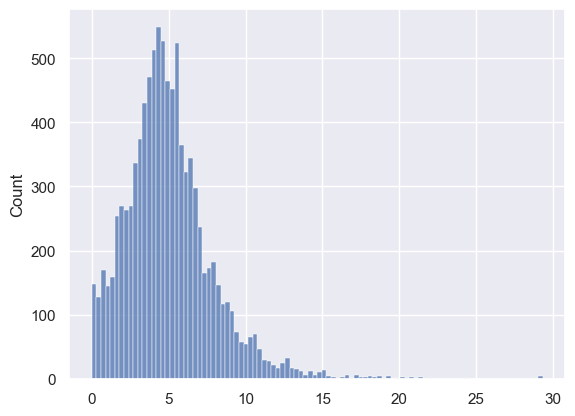

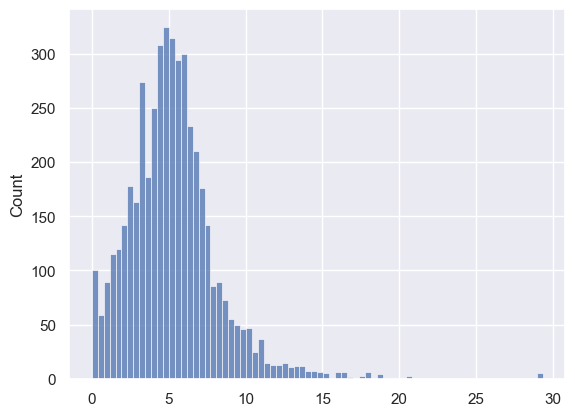

In [47]:
for i in [0, 4, -1]:
    sns.histplot(signals[i])
    plt.show()


In [ ]:
nx.draw(H, node_size={i: H.nodes[i]['signal'] for i in H.nodes}, edge_color='black', node_color='red', with_labels=False)
